# <h1><center>Demo 9</center></h1>

## Folium



In [1]:
# Import Geopandas and Pandas
import geopandas as gpd
import pandas as pd
import folium

In [3]:
# Read the CSV file acled2019.csv stored in the subfolder 'data'
df = pd.read_csv("data/acled2019.csv")
df.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,6768128,887,YEM45982,45982,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,Habban,14.3541,47.0765,2,Yemen Data Project; Aden al Ghad; Al Janoob al...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",0,1580761030,YEM
1,6768129,887,YEM45983,45983,31 December 2019,2019,1,Strategic developments,Change to group/activity,Military Forces of Yemen (2012-) Security Belt...,...,Habban,14.3541,47.0765,2,Al Janoob al Youm; Yemen Data Project,Local partner-National,"On 31 December 2019, forces loyal to the South...",0,1580761030,YEM
2,6768130,887,YEM45984,45984,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,Wadi Haburah,14.2081,47.1570,1,Al Janoob al Youm; Aden al Ghad; Yemen Data Pr...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",1,1580761030,YEM
3,6715395,356,IND68948,68948,31 December 2019,2019,1,Protests,Peaceful protest,Protesters (India),...,Bhubaneswar,20.2724,85.8338,1,Pioneer (India),National,"On 31 December, students' wing of INC and Mili...",0,1578514389,IND
4,6943236,222,SLV861,861,31 December 2019,2019,1,Violence against civilians,Attack,B-18: Barrio-18,...,Huizucar,13.5894,-89.2383,1,El Salvador.com,National,On 31th December 2019 in Huizucar (La Libertad...,1,1582839958,SLV


In [4]:
df.shape

(198761, 31)

In [5]:
df = df.drop(labels=range(0,198000), axis = 0)
df.shape

(761, 31)

In [6]:
gdf = gpd.GeoDataFrame(
    df, 
    geometry=gpd.points_from_xy(df.longitude, df.latitude)
)
gdf.head()

C:\Applications\anaconda3\envs\geopy\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,geometry
198000,5597769,356,IND45538,45538,02 January 2019,2019,1,Violence against civilians,Attack,Police Forces of India (2014-),...,19.0730,72.8830,2,Times of India,National,"On 2 Jan, in Mumbai area (Mumbai City, Maha), ...",0,1563366759,IND,POINT (72.88300 19.07300)
198001,5587530,50,BGD14369,14369,02 January 2019,2019,1,Riots,Mob violence,Rioters (Bangladesh),...,21.9333,90.4333,1,Daily Star (Bangladesh),National,"On Jan 2, villagers caught and beat the activi...",0,1563366745,BGD,POINT (90.43330 21.93330)
198002,5587531,50,BGD14370,14370,02 January 2019,2019,1,Violence against civilians,Attack,AL: Bangladesh Awami League,...,21.9333,90.4333,1,Daily Star (Bangladesh),National,"On Jan 2, a local BNP leader Motaleb Hawlader ...",0,1563366745,BGD,POINT (90.43330 21.93330)
198003,6200651,31,AZE7144,7144,02 January 2019,2019,1,Battles,Armed clash,Military Forces of Armenia (2018-),...,40.8589,45.6242,1,Ministry of Defence of Azerbaijan,Other,"On 2 January, military forces of Armenia fired...",0,1572006479,AZE,POINT (45.62420 40.85890)
198004,6411595,231,ETH5090,5090,02 January 2019,2019,1,Violence against civilians,Abduction/forced disappearance,Unidentified Armed Group (Ethiopia),...,9.0330,38.7000,2,Zehabesha,International,"02 January: Dembi Dolo University president, D...",0,1576000001,ETH,POINT (38.70000 9.03300)


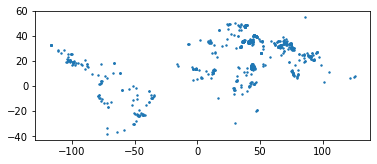

In [7]:
gdf.plot(markersize=2);

In [8]:
conflict_trimmed = df[["event_id_cnty","latitude","longitude"]]
conflict_trimmed.head()

,event_id_cnty,latitude,longitude
198000,IND45538,19.0730,72.8830
198001,BGD14369,21.9333,90.4333
198002,BGD14370,21.9333,90.4333
198003,AZE7144,40.8589,45.6242
198004,ETH5090,9.0330,38.7000


In [9]:
m = folium.Map(location=[45.5236, -122.6750])
m

In [10]:
conflict_trimmed__map=folium.Map(location=[conflict_trimmed.latitude.mean(), conflict_trimmed.longitude.mean()], zoom_start=5)
conflict_trimmed__map

In [11]:
for index, location_info in conflict_trimmed.iterrows():
    folium.Marker([location_info["latitude"],
                  location_info["longitude"]],
                 popup = location_info["event_id_cnty"]).add_to(conflict_trimmed__map)

In [12]:
conflict_trimmed__map

## End of demo